In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Data Generation

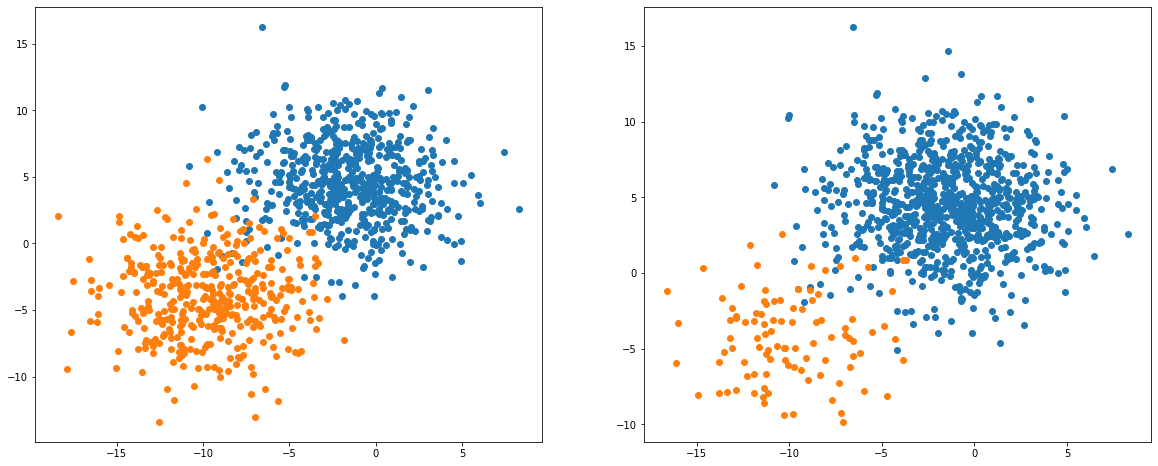

In [2]:
X, y = make_blobs(n_samples=[600, 400], centers=None, n_features=2, random_state=1, cluster_std=3)
X_imb, y_imb = make_blobs(n_samples=[900, 100], centers=None, n_features=2, random_state=1, cluster_std=3)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
for class_value in range(2):
    row_ix = np.where(y == class_value)
    ax1.scatter(X[row_ix, 0], X[row_ix, 1])

for class_value in range(2):
    row_ix = np.where(y_imb == class_value)
    ax2.scatter(X_imb[row_ix, 0], X_imb[row_ix, 1])
plt.show()

## DummyClassifier

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.inspection import DecisionBoundaryDisplay

In [4]:
clf = DummyClassifier(strategy="most_frequent")
clf_imb = DummyClassifier(strategy="most_frequent")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
clf.fit(X_train, y_train)

X_imb_train, X_imb_test, y_imb_train, y_imb_test = train_test_split(X_imb, y_imb, test_size=0.25, stratify=y, random_state=42)
clf_imb.fit(X_imb_train, y_imb_train)

print(f"Accuracy for imbalanced        : {clf.score(X_test, y_test)}")
print(f"Accuracy for severe imbalanced : {clf_imb.score(X_imb_test, y_imb_test)}")

Accuracy for imbalanced        : 0.6
Accuracy for severe imbalanced : 0.904


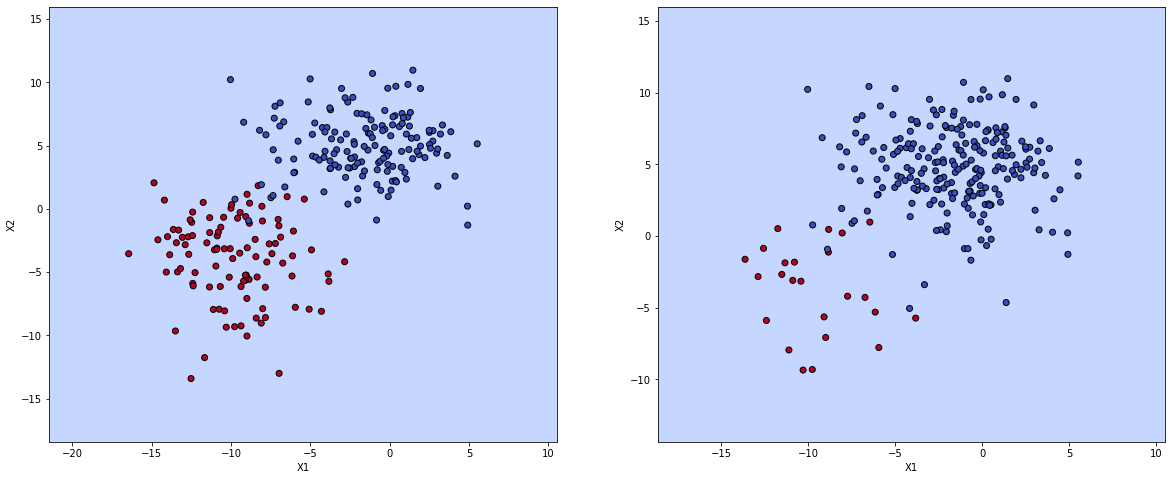

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

disp = DecisionBoundaryDisplay.from_estimator(clf, X_test, response_method="predict", xlabel="X1", ylabel="X2", alpha=0.5, eps=5, cmap=plt.cm.coolwarm, ax=ax1)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k", cmap=plt.cm.coolwarm)

disp = DecisionBoundaryDisplay.from_estimator(clf_imb, X_imb_test, response_method="predict", xlabel="X1", ylabel="X2", alpha=0.5, eps=5, cmap=plt.cm.coolwarm, ax=ax2)
disp.ax_.scatter(X_imb_test[:, 0], X_imb_test[:, 1], c=y_imb_test, edgecolor="k", cmap=plt.cm.coolwarm)

plt.show()

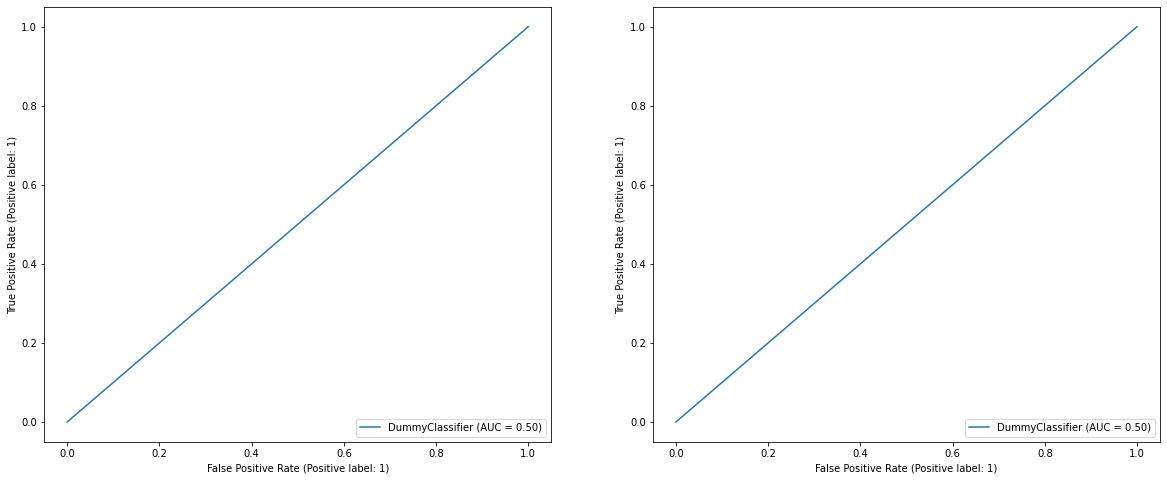

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax1)
RocCurveDisplay.from_estimator(clf_imb, X_imb_test, y_imb_test, ax=ax2)
plt.show()

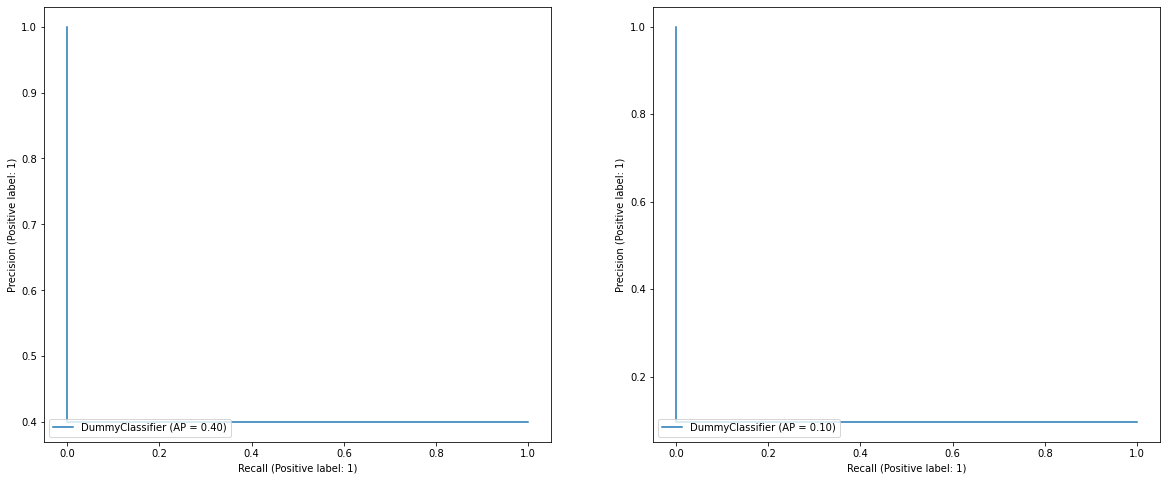

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax=ax1)
PrecisionRecallDisplay.from_estimator(clf_imb, X_imb_test, y_imb_test, ax=ax2)
plt.show()

## RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf_imb = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, y_train)
clf_imb.fit(X_imb_train, y_imb_train)

print(f"Accuracy for imbalanced        : {clf.score(X_test, y_test)}")
print(f"Accuracy for severe imbalanced : {clf_imb.score(X_imb_test, y_imb_test)}")

Accuracy for imbalanced        : 0.972
Accuracy for severe imbalanced : 0.976


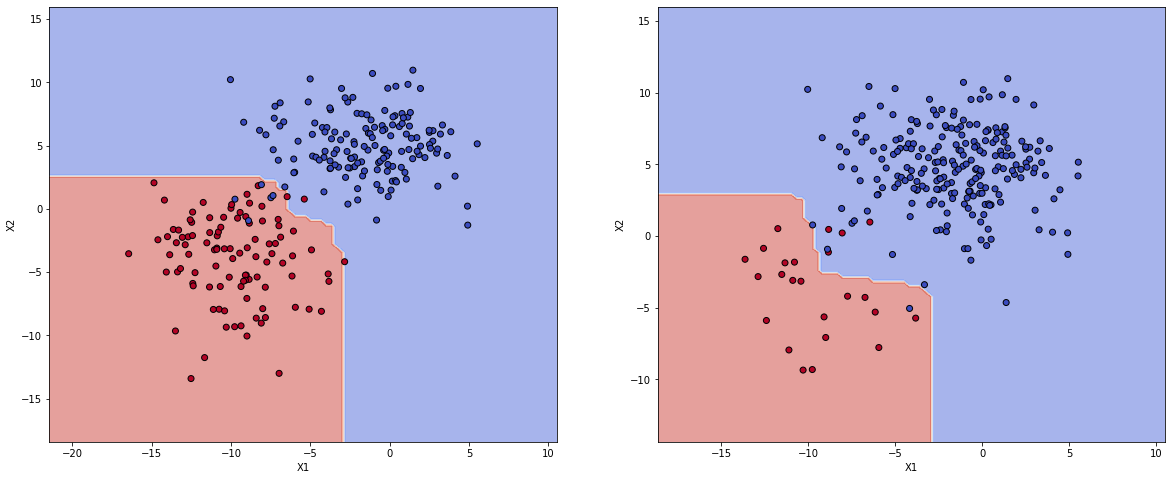

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

disp = DecisionBoundaryDisplay.from_estimator(clf, X_test, response_method="predict", xlabel="X1", ylabel="X2", alpha=0.5, eps=5, cmap=plt.cm.coolwarm, ax=ax1)
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k", cmap=plt.cm.coolwarm)

disp = DecisionBoundaryDisplay.from_estimator(clf_imb, X_imb_test, response_method="predict", xlabel="X1", ylabel="X2", alpha=0.5, eps=5, cmap=plt.cm.coolwarm, ax=ax2)
disp.ax_.scatter(X_imb_test[:, 0], X_imb_test[:, 1], c=y_imb_test, edgecolor="k", cmap=plt.cm.coolwarm)

plt.show()

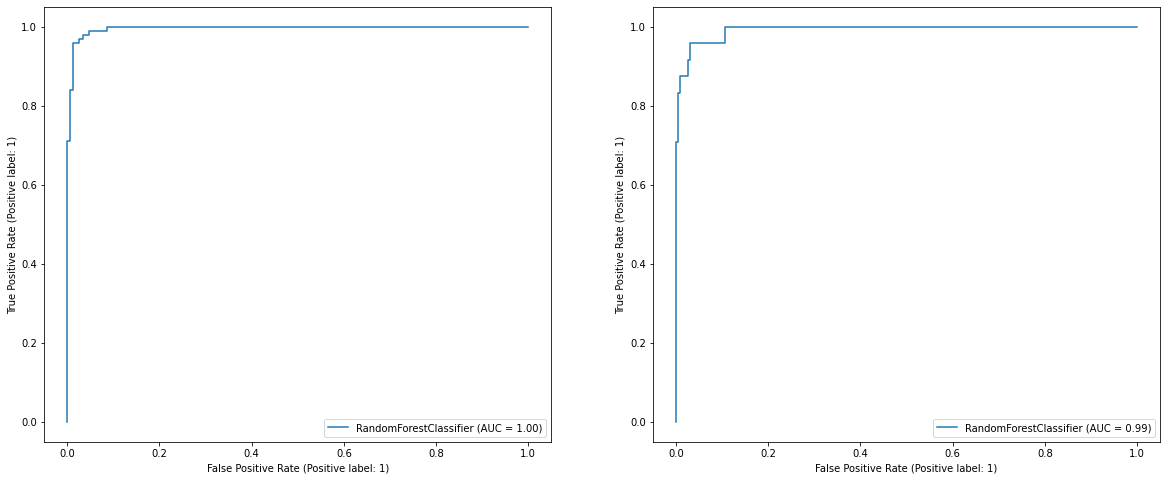

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax1)
RocCurveDisplay.from_estimator(clf_imb, X_imb_test, y_imb_test, ax=ax2)
plt.show()

If we are concerned about TP, FP, FN but not TN (usually this is the case for imbalanced data), precision/recall curve can be used.

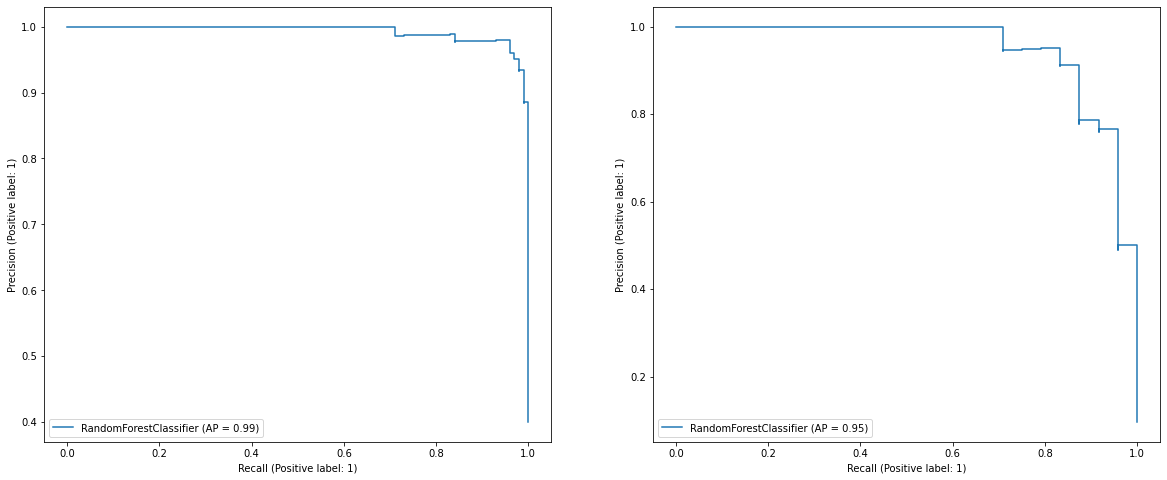

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, ax=ax1)
PrecisionRecallDisplay.from_estimator(clf_imb, X_imb_test, y_imb_test, ax=ax2)
plt.show()